In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('12.2 merc.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005.0,5200,Automatic,63000.0,Petrol,325.0,NaN,1.8
1,S Class,2017.0,34948,Automatic,27000.0,Hybrid,20.0,61.4,NaN
2,NaN,2016.0,49948,Automatic,6200.0,Petrol,555.0,28.0,5.5
3,G Class,2016.0,61948,Automatic,16000.0,Petrol,325.0,30.4,4.0
4,G Class,2016.0,73948,Automatic,4000.0,Petrol,325.0,30.1,4.0


Histogram for year


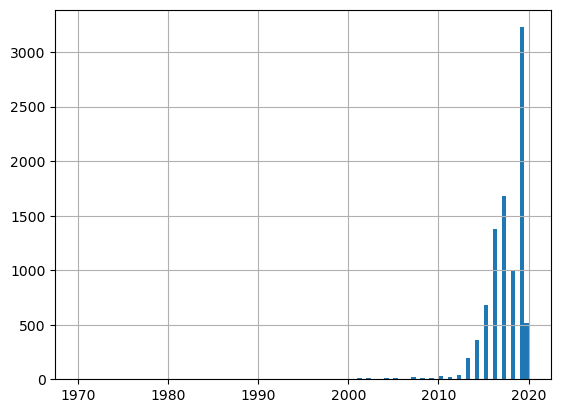

Histogram for price


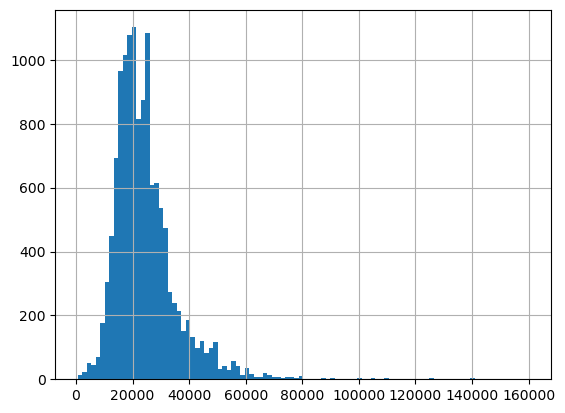

Histogram for mileage


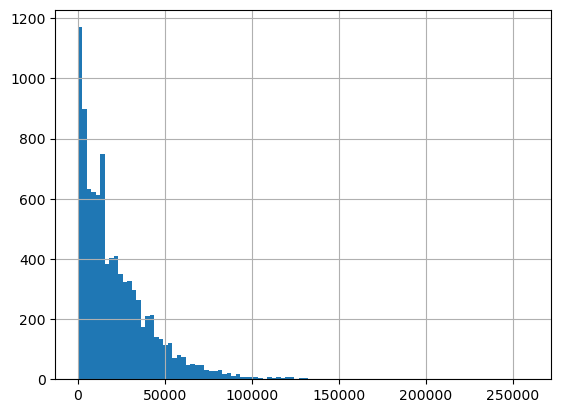

Histogram for tax


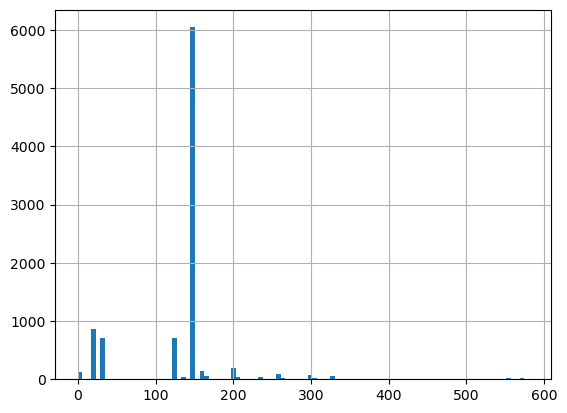

Histogram for mpg


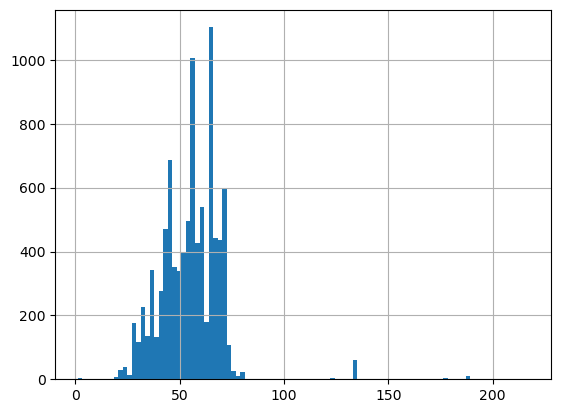

Histogram for engineSize


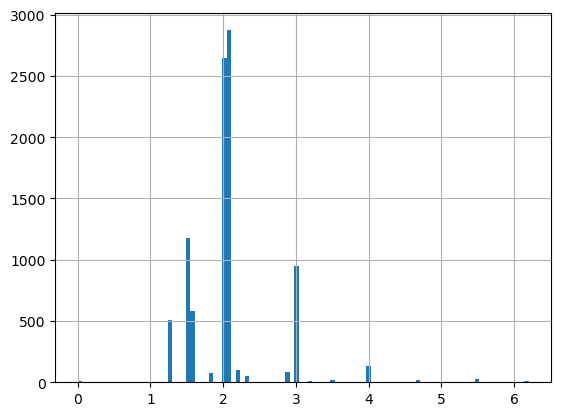

In [5]:
import matplotlib.pyplot as plt

num_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

for col in num_cols:
    print(f'Histogram for {col}')
    df[col].hist(bins=100)
    plt.show()

In [6]:
def calculate_iqr_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25

    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

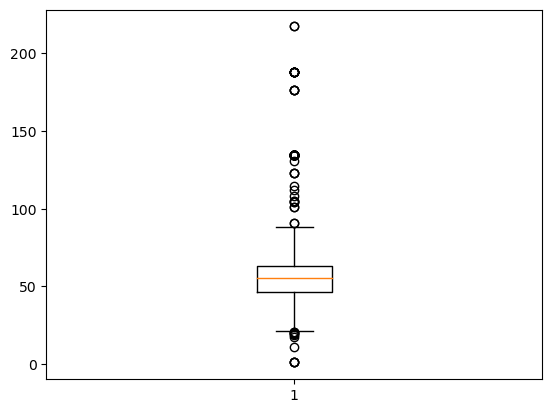

In [18]:
plt.boxplot(df.mpg)
plt.show()

In [19]:
mpg_bounds = calculate_iqr_boundaries(df['mpg'])
mpg_bounds

(20.800000000000008, 88.79999999999998)

In [20]:
df_1 = df[(df['mpg'] >= mpg_bounds[0]) & (df['mpg'] <= mpg_bounds[1])]

print(df_1.shape[0])
print(df_1.shape[0] / df.shape[0])

13016
0.9921487918286455


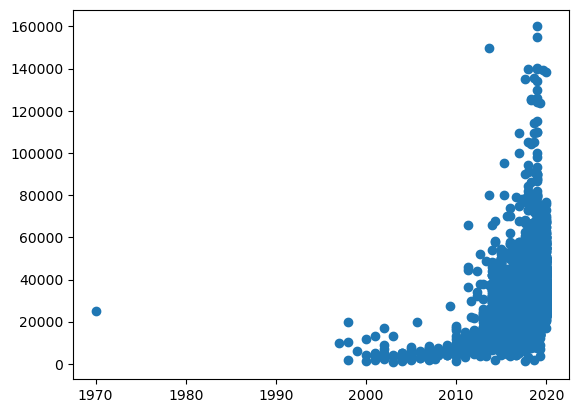

In [21]:
plt.scatter(df_1['year'], df_1['price'])

In [12]:
from sklearn.ensemble import IsolationForest

In [14]:
from sklearn.impute import KNNImputer
imp_knn = KNNImputer(n_neighbors=3)

num_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
df[num_columns] = imp_knn.fit_transform(df[num_columns])
from sklearn.impute import SimpleImputer
imp_const_unknown = SimpleImputer(strategy='constant', fill_value='unknown')

unk_cols = ['model']

df[unk_cols] = imp_const_unknown.fit_transform(df[unk_cols])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005.0,5200,Automatic,63000.0,Petrol,325.0,36.7,1.8
1,S Class,2017.0,34948,Automatic,27000.0,Hybrid,20.0,61.4,1.9
2,NaN,2016.0,49948,Automatic,6200.0,Petrol,555.0,28.0,5.5
3,G Class,2016.0,61948,Automatic,16000.0,Petrol,325.0,30.4,4.0
4,G Class,2016.0,73948,Automatic,4000.0,Petrol,325.0,30.1,4.0


In [15]:
from sklearn.impute import SimpleImputer
imp_const_unknown = SimpleImputer(strategy='constant', fill_value='unknown')

unk_cols = ['model']

df[unk_cols] = imp_const_unknown.fit_transform(df[unk_cols])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005.0,5200,Automatic,63000.0,Petrol,325.0,36.7,1.8
1,S Class,2017.0,34948,Automatic,27000.0,Hybrid,20.0,61.4,1.9
2,unknown,2016.0,49948,Automatic,6200.0,Petrol,555.0,28.0,5.5
3,G Class,2016.0,61948,Automatic,16000.0,Petrol,325.0,30.4,4.0
4,G Class,2016.0,73948,Automatic,4000.0,Petrol,325.0,30.1,4.0


In [22]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [23]:
isf = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
y_pred = isf.fit_predict(df_1[['year', 'price']])

In [24]:
df_1['price_year_outlier'] = y_pred
df_1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6748\3753726104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['price_year_outlier'] = y_pred


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_year_outlier
0,SLK,2005.0,5200,Automatic,63000.0,Petrol,325.0,36.7,1.8,-1
1,S Class,2017.0,34948,Automatic,27000.0,Hybrid,20.0,61.4,1.9,1
2,unknown,2016.0,49948,Automatic,6200.0,Petrol,555.0,28.0,5.5,1
3,G Class,2016.0,61948,Automatic,16000.0,Petrol,325.0,30.4,4.0,1
4,G Class,2016.0,73948,Automatic,4000.0,Petrol,325.0,30.1,4.0,1


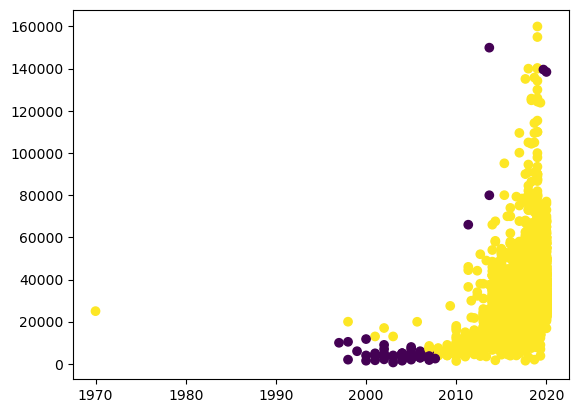

In [25]:
plt.scatter(df_1['year'], df_1['price'], c=df_1['price_year_outlier'])

In [26]:
df_2 = df_1[df_1['price_year_outlier'] == 1]
df_2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_year_outlier
1,S Class,2017.0,34948,Automatic,27000.0,Hybrid,20.0,61.4,1.9,1
2,unknown,2016.0,49948,Automatic,6200.0,Petrol,555.0,28.0,5.5,1
3,G Class,2016.0,61948,Automatic,16000.0,Petrol,325.0,30.4,4.0,1
4,G Class,2016.0,73948,Automatic,4000.0,Petrol,325.0,30.1,4.0,1
6,GLE Class,2018.0,30948,Automatic,16000.0,Diesel,145.0,47.9,2.1,1


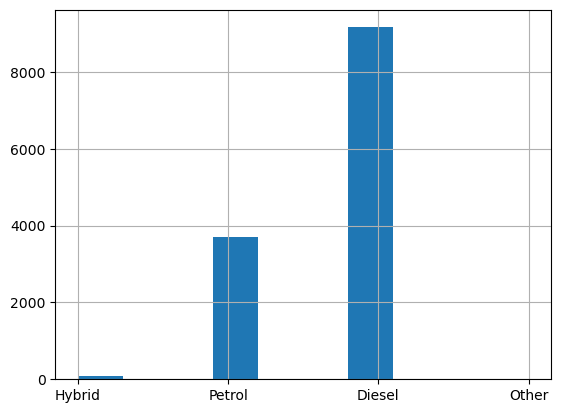

In [27]:
df_2['fuelType'].hist()
plt.show()

In [28]:
serie = df_2['fuelType'].value_counts()
serie

fuelType
Diesel    9165
Petrol    3697
Hybrid      86
Other        3
Name: count, dtype: int64

In [29]:
serie = serie / serie.sum() * 100
serie

fuelType
Diesel    70.766736
Petrol    28.546058
Hybrid     0.664041
Other      0.023164
Name: count, dtype: float64

In [30]:
keep_cats = serie[serie > 5].index
keep_cats

Index(['Diesel', 'Petrol'], dtype='object', name='fuelType')

C:\Users\User\AppData\Local\Temp\ipykernel_6748\3880924308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['fuelType'] = np.where(df_2['fuelType'].isin(keep_cats), df_2['fuelType'], 'Other')


<Axes: >

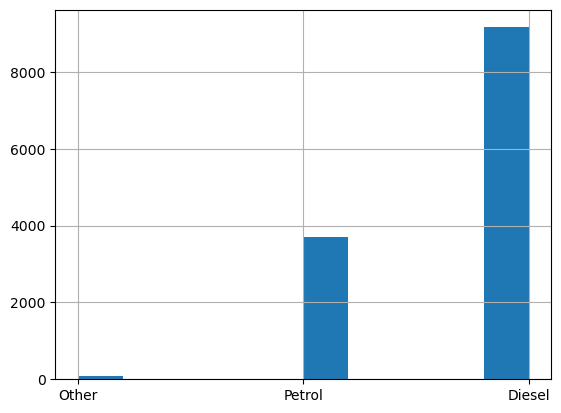

In [31]:
import numpy as np

df_2['fuelType'] = np.where(df_2['fuelType'].isin(keep_cats), df_2['fuelType'], 'Other')
df_2['fuelType'].hist()

In [32]:
df_2.to_csv('merc_train.csv', index=False)